In [63]:
import sys
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


print(sys.executable)

print("==========================================")

input_shape = (224, 224, 3)
mobileNetV2 = MobileNetV2(
    weights="imagenet", include_top=False, input_shape=input_shape
)

j:\Work\Career\Vacations-2025\Food Classifier\.venv\Scripts\python.exe


In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "Data/Train"
val_dir = "Data/Validation"

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

batch_size = 16

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=batch_size, class_mode="categorical"
)


augmentor = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    fill_mode="nearest",
)

Found 25 images belonging to 5 classes.


In [65]:
# from pathlib import Path


# num_augmented_images = 4

# train_dir_path = Path("Data/Train")

# class_names = [folder.name for folder in train_dir_path.iterdir() if folder.is_dir()]
# print(class_names)

# img_count_by_class = {}
# for folder in train_dir_path.iterdir():
#     img_count_by_class[folder.name] = len(list(folder.glob("*.jpg")))
# print(img_count_by_class)
# print(f"Total training samples: {sum(img_count_by_class.values())}")

# print("==========================================")

# for c in class_names:
#     class_dir = train_dir_path / f"{c}"
#     if not class_dir.is_dir():
#         continue
#     class_imgs = [file for file in class_dir.iterdir() if file.is_file()]
#     for img in class_imgs:
#         if "_aug_" in img.name:
#             continue
#         image = load_img(img, target_size=(224, 224))
#         img_ary = img_to_array(image)
#         img_ary = np.expand_dims(img_ary, axis=0)
#         i = 0
#         for batch in augmentor.flow(
#             img_ary,
#             batch_size=1,
#             save_to_dir=class_dir,
#             save_prefix=f"{img.name}_aug",
#             save_format="jpg",
#         ):
#             i += 1
#             if i >= num_augmented_images:
#                 break

# print(f"generated a total of {4 * 109} images")
# img_count_by_class_augmented = {}

# for folder in train_dir_path.iterdir():
#     img_count_by_class_augmented[folder.name] = len(list(folder.glob("*.jpg")))
# print(img_count_by_class_augmented)
# print(
#     f"Total training samples after augmenting: {sum(img_count_by_class_augmented.values())}"
# )


In [66]:
train_generator = augmentor.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)

Found 545 images belonging to 5 classes.


In [67]:
print("=== TRAINING GENERATOR INFO ===")
print(f"Found {train_generator.samples} images")
print(f"Steps per epoch: {len(train_generator)}")
print(f"Batch size: {train_generator.batch_size}")
print(f"Images per epoch: {len(train_generator) * train_generator.batch_size}")

# Test one batch
batch_x, batch_y = next(train_generator)
print(f"Batch shape: {batch_x.shape}")

=== TRAINING GENERATOR INFO ===
Found 545 images
Steps per epoch: 18
Batch size: 32
Images per epoch: 576
Batch shape: (32, 224, 224, 3)


In [68]:
x = GlobalAveragePooling2D()(mobileNetV2.output)
predictions = Dense(5, activation="softmax")(x)

model_to_be_augmented = Model(inputs=mobileNetV2.input, outputs=predictions)

mobileNetV2.trainable = False

model_to_be_augmented.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# model_to_be_augmented.summary()

In [69]:
history = model_to_be_augmented.fit(
    train_generator, epochs=5, validation_data=val_generator
)

j:\Work\Career\Vacations-2025\Food Classifier\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 696ms/step - accuracy: 0.4312 - loss: 1.4574 - val_accuracy: 0.8800 - val_loss: 0.5223
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 552ms/step - accuracy: 0.9119 - loss: 0.4244 - val_accuracy: 1.0000 - val_loss: 0.1779
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 777ms/step - accuracy: 0.9651 - loss: 0.1857 - val_accuracy: 1.0000 - val_loss: 0.1142
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 723ms/step - accuracy: 0.9835 - loss: 0.1132 - val_accuracy: 1.0000 - val_loss: 0.0849
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 867ms/step - accuracy: 0.9927 - loss: 0.0864 - val_accuracy: 1.0000 - val_loss: 0.0676


In [70]:
class_names = list(train_generator.class_indices.keys())

Accuracy: 1.0000

Precision by class:
biryani: 1.0000
chapli_kebab: 1.0000
chocolate_cake: 1.0000
samosa: 1.0000
seekh_kebab: 1.0000
Weighted Precision: 1.0000

Classification Report:
                precision    recall  f1-score   support

       biryani       1.00      1.00      1.00         5
  chapli_kebab       1.00      1.00      1.00         4
chocolate_cake       1.00      1.00      1.00         7
        samosa       1.00      1.00      1.00         5
   seekh_kebab       1.00      1.00      1.00         4

      accuracy                           1.00        25
     macro avg       1.00      1.00      1.00        25
  weighted avg       1.00      1.00      1.00        25



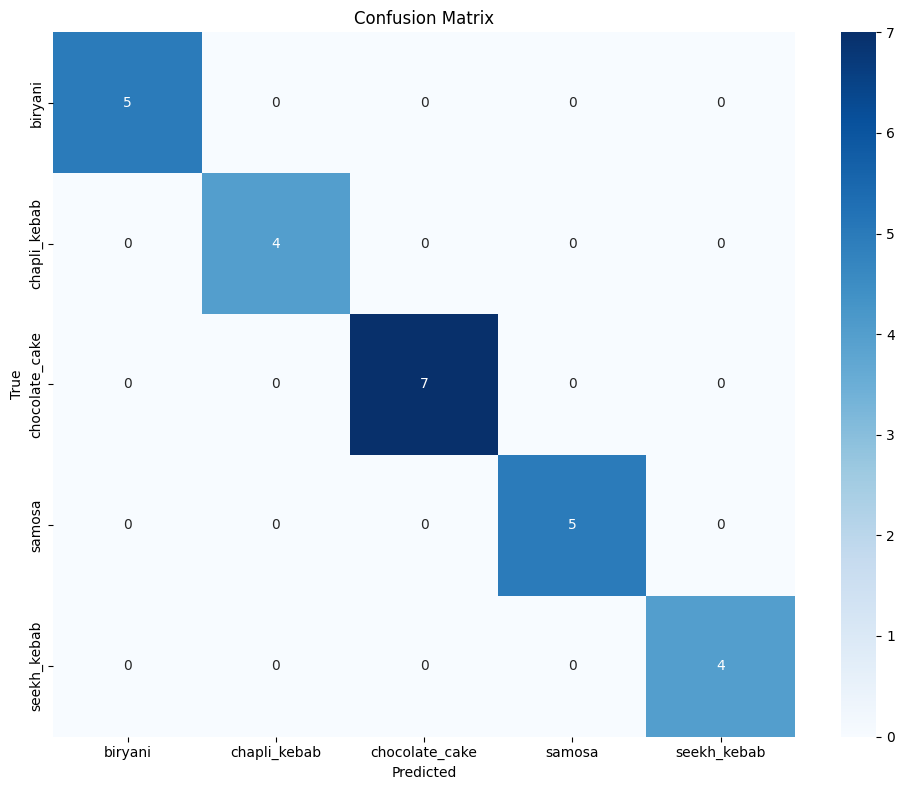

In [ ]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    confusion_matrix,
)
import seaborn as sns

# Get actual labels and predictions for validation data
val_steps = val_generator.samples // batch_size + 1
y_true = []
y_pred = []

# Reset the validation generator
val_generator.reset()

# Get true labels and predictions
for i in range(val_steps):
    try:
        x, y = next(val_generator)
        predictions = model_to_be_augmented.predict(x, verbose=0)
        y_true.extend(np.argmax(y, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))
    except StopIteration:
        break

# Calculate accuracy score
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision for each class and weighted average
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
weighted_precision = precision_score(
    y_true, y_pred, average="weighted", zero_division=0
)

# Print per-class precision
print("\nPrecision by class:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {precision[i]:.4f}")
print(f"Weighted Precision: {weighted_precision:.4f}")

# Print comprehensive classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Visualize confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Error Analysis


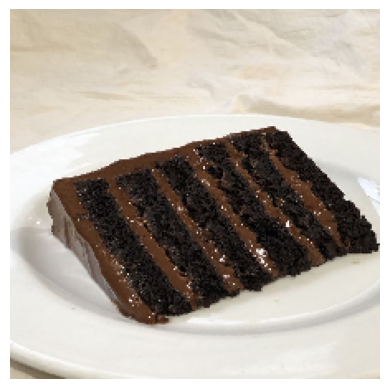

In [80]:
from tensorflow.keras.preprocessing import image

image_path = "cake.jpg"
img = image.load_img(image_path, target_size=(224, 224))


plt.imshow(img)
plt.axis("off")
plt.show()

In [81]:
img_ary = image.img_to_array(img)
img_ary = np.expand_dims(img_ary, axis=0)
preprocessed_img = preprocess_input(img_ary)


predictions = model_to_be_augmented.predict(preprocessed_img, verbose=0)
predicted_class = np.argmax(predictions[0])
class_names = list(train_generator.class_indices.keys())


print(f"Predicted class: {class_names[predicted_class]}")
print(f"Confidence: {predictions[0][predicted_class]:.4f}")

Predicted class: chocolate_cake
Confidence: 0.9326


In [94]:
model_to_be_augmented.layers[-5]

<Conv2D name=Conv_1, built=True>

In [93]:
model_to_be_augmented.layers[-5].__class__.__name__

'Conv2D'

In [97]:
layer_name = model_to_be_augmented.layers[-5].name
layer_name

'Conv_1'

In [98]:
x = GlobalAveragePooling2D()(mobileNetV2.output)
predictions = Dense(5, activation="softmax")(x)


grad_model = Model(
    inputs=mobileNetV2.input,
    outputs=[predictions, mobileNetV2.get_layer("Conv_1").output],
)
mobileNetV2.trainable = False